<h1>Análise de Dados do Enem 2019</h1>
<p>Nesse notebook farei a análise de uma amostragem realizada do banco de dados do Exame Nacional do Ensino Médio em 2019</p>
*Dados fornecidos pelo INEP*

##Objetivos:

### Importando as bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### O banco de dados utilizado foi montado diretamente do meu Drive.

In [5]:
enem = "/content/drive/MyDrive/Enem/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
enem_df = pd.read_csv(enem)



### Checando as 5 primeiras linhas do Enem Dataframe

In [6]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


### Conferindo tamanho do ENEM Dataframe

In [7]:
enem_col = len(enem_df.columns)
print(f'Tamanho do ENEM Dataframe: {len(enem_df)}')
print(f'Quantidade de colunas: {enem_col}')

Tamanho do ENEM Dataframe: 127380
Quantidade de colunas: 136


### Limpeza de Dados

Verificando se existem inscrições duplicadas



In [8]:
enem_df['NU_INSCRICAO'].duplicated().value_counts()

False    127380
Name: NU_INSCRICAO, dtype: int64

In [9]:
enem_df['NU_IDADE'].isna().value_counts()

False    127380
Name: NU_IDADE, dtype: int64

Excluindo colunas desnecessárias à análise

In [10]:
# Colunas que contém respostas para questões
enem_df.drop(enem_df.loc[:,'Q001':'Q025'], axis=1, inplace=True)

In [11]:
# Colunas que contém dados sobre a acessibilidade, gabaritos e notas (com exceção da redação)
enem_df.drop(enem_df.loc[:,'IN_ESTUDA_CLASSE_HOSPITALAR':'NU_NOTA_COMP5'], axis=1, inplace=True)

In [12]:
# Verificando quantidade de colunas restantes
enem_novas_col = len(enem_df.columns)
print(f'De, inicialmente, {enem_col} colunas agora o Dataframe possui {enem_novas_col}')

De, inicialmente, 136 colunas agora o Dataframe possui 45


### Checando os 5 estados com maior número de inscritos

In [13]:
enem_df['SG_UF_RESIDENCIA'].value_counts().head()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
Name: SG_UF_RESIDENCIA, dtype: int64

### Checando os 5 estados com o menor número de inscritos

In [14]:
enem_df['SG_UF_RESIDENCIA'].value_counts().tail()

RO    1400
TO    1178
AP    1047
AC     946
RR     366
Name: SG_UF_RESIDENCIA, dtype: int64

### Verificando se todos os estados brasileiros possuem inscritos no ENEM

In [15]:
if len(enem_df['SG_UF_RESIDENCIA'].unique()) == 27:
  print(f"Todos os estados brasileiros participam do ENEM:\n{enem_df['SG_UF_RESIDENCIA'].unique()}")

Todos os estados brasileiros participam do ENEM:
['PA' 'RO' 'MT' 'AC' 'AM' 'RR' 'MA' 'PR' 'BA' 'PI' 'CE' 'PE' 'AP' 'TO'
 'SC' 'GO' 'MG' 'SP' 'SE' 'RJ' 'PB' 'AL' 'RN' 'ES' 'DF' 'RS' 'MS']


### Qual a média de idade dos inscritos do ENEM?

In [16]:
enem_df['NU_IDADE'].mean()

22.094355471816613

Mais jovem e mais velho incritos

In [17]:
print(f'Mais jovem: {enem_df["NU_IDADE"].min()}')
print(f'Mais velho: {enem_df["NU_IDADE"].max()}')

Mais jovem: 13
Mais velho: 82


<h2>Visualização de Dados


### Como se dá a distribuição de raça?


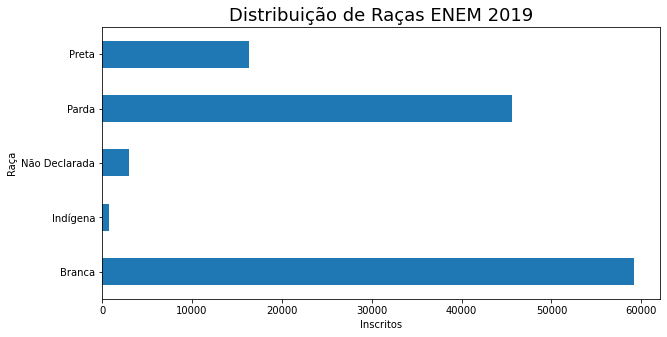

In [175]:
# Dicionário que executará o mapeamento
racas_enem = {3: 'Branca', 1: 'Parda', 2: 'Preta', 4: 'Não Declarada', 5: 'Indígena'}

enem_df['RACA'] = enem_df['TP_COR_RACA'].map(racas_enem)
enem_df.groupby('RACA')['RACA'].count().plot(kind='barh', figsize=(10,5))

plt.title('Distribuição de Raças ENEM 2019', fontsize=18)
plt.ylabel('Raça')
plt.xlabel('Inscritos')
plt.show()


### Como se dá a distribuição das idades dos inscritos?

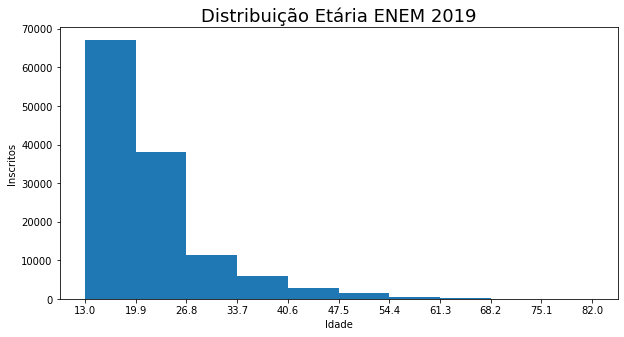

In [174]:
count, bin_edges = np.histogram(enem_df['NU_IDADE'])

enem_df['NU_IDADE'].plot(kind='hist', xticks=bin_edges, figsize=(10,5))

plt.title('Distribuição Etária ENEM 2019', fontsize=18)
plt.ylabel('Inscritos')
plt.xlabel('Idade')
plt.show()

### Distribuição de inscritos através dos estados

Primeiramente, criarei uma nova tabela contendo a quantidade de inscritos por estado.

In [64]:
enem_pie = enem_df['SG_UF_RESIDENCIA'].value_counts().rename_axis('ESTADO').reset_index(name='TOTAL_INSCRITOS')
enem_pie.head()

,ESTADO,TOTAL_INSCRITOS
0,SP,20264
1,MG,13547
2,BA,10040
3,RJ,8467
4,CE,7381


A partir da tabela criada, plotarei um Gráfico Pizza da distribuição por estado.

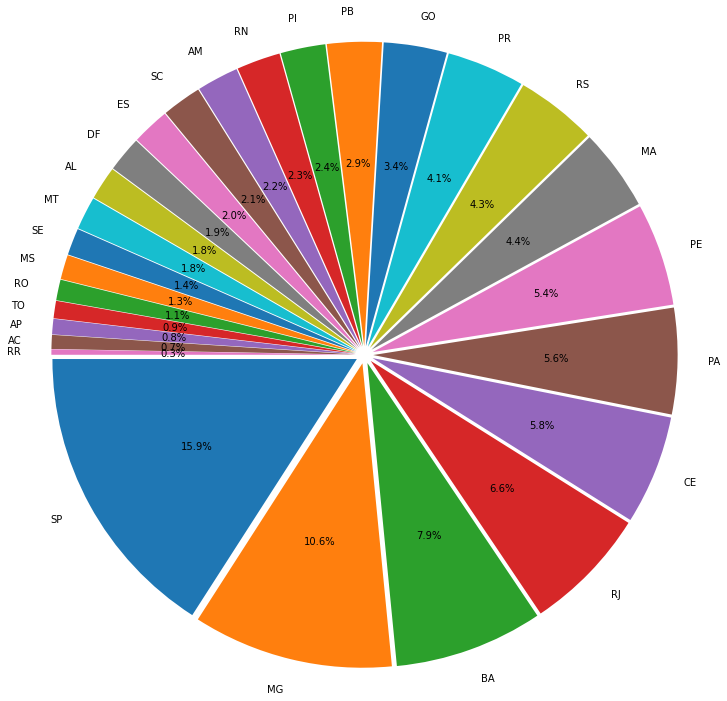

In [85]:
total = enem_pie['TOTAL_INSCRITOS']
estados = enem_pie['ESTADO']

separacao = []
for estado in enem_pie['ESTADO']:
  separacao.append(0.1)

plt.pie(total, labels=estados, explode=separacao, startangle=180, radius=3.5, autopct='%1.1f%%')
plt.show()

### Média das Notas da Redação de acordo com o estado.


Criando um novo Dataframe que armazenará as média para as notas da redação de cada estado.

In [192]:
enem_media_redacao = enem_df.groupby('SG_UF_RESIDENCIA')['NU_NOTA_REDACAO'].mean()
enem_med = enem_media_redacao.to_frame()
enem_med.reset_index(inplace=True)
enem_med.rename(columns={'SG_UF_RESIDENCIA':'ESTADO', 'NU_NOTA_REDACAO':'MEDIA'}, inplace=True)
enem_med.head()

,ESTADO,MEDIA
0,AC,516.268861
1,AL,553.685988
2,AM,502.986945
3,AP,522.553191
4,BA,555.638256


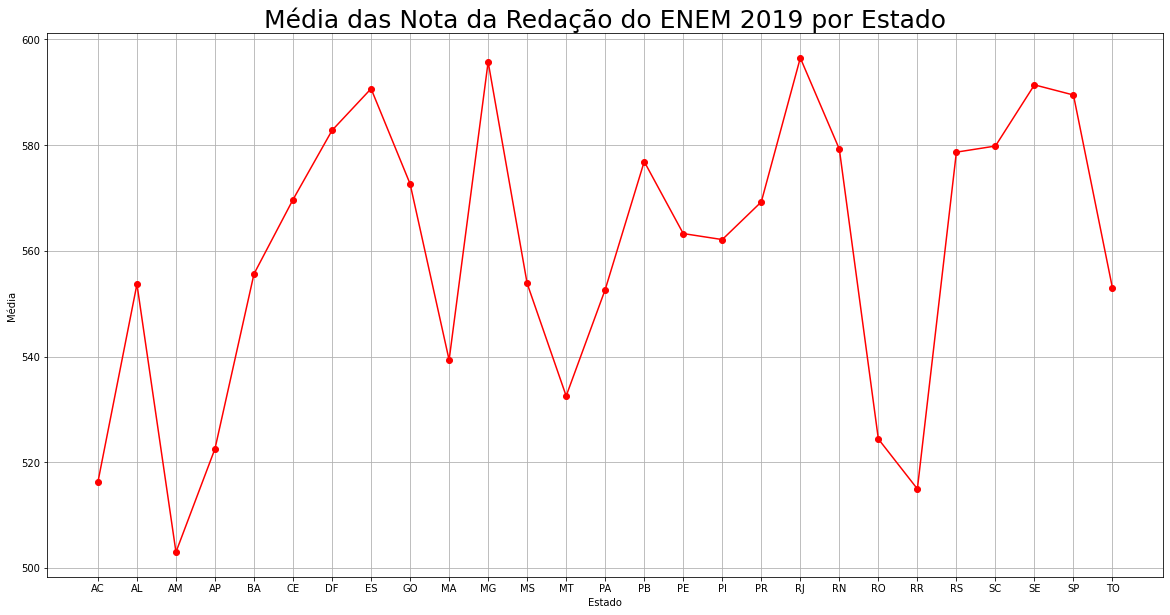

In [173]:
plt.figure(figsize=(20,10))
plt.plot(enem_med['ESTADO'], enem_med['MEDIA'], color='red', marker='o')

plt.title('Média das Nota da Redação do ENEM 2019 por Estado', fontsize=25)
plt.xlabel('Estado')
plt.ylabel('Média')
plt.grid(True)

plt.show()

In [87]:
for col in enem_df.columns:
  print(col)

NU_INSCRICAO
NU_ANO
CO_MUNICIPIO_RESIDENCIA
NO_MUNICIPIO_RESIDENCIA
CO_UF_RESIDENCIA
SG_UF_RESIDENCIA
NU_IDADE
TP_SEXO
TP_ESTADO_CIVIL
TP_COR_RACA
TP_NACIONALIDADE
CO_MUNICIPIO_NASCIMENTO
NO_MUNICIPIO_NASCIMENTO
CO_UF_NASCIMENTO
SG_UF_NASCIMENTO
TP_ST_CONCLUSAO
TP_ANO_CONCLUIU
TP_ESCOLA
TP_ENSINO
IN_TREINEIRO
CO_ESCOLA
CO_MUNICIPIO_ESC
NO_MUNICIPIO_ESC
CO_UF_ESC
SG_UF_ESC
TP_DEPENDENCIA_ADM_ESC
TP_LOCALIZACAO_ESC
TP_SIT_FUNC_ESC
IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DEFICIENCIA_AUDITIVA
IN_SURDO_CEGUEIRA
IN_DEFICIENCIA_FISICA
IN_DEFICIENCIA_MENTAL
IN_DEFICIT_ATENCAO
IN_DISLEXIA
IN_DISCALCULIA
IN_AUTISMO
IN_VISAO_MONOCULAR
IN_OUTRA_DEF
IN_GESTANTE
IN_LACTANTE
IN_IDOSO
NU_NOTA_REDACAO
RACA


### Outliers nas Notas da Redação

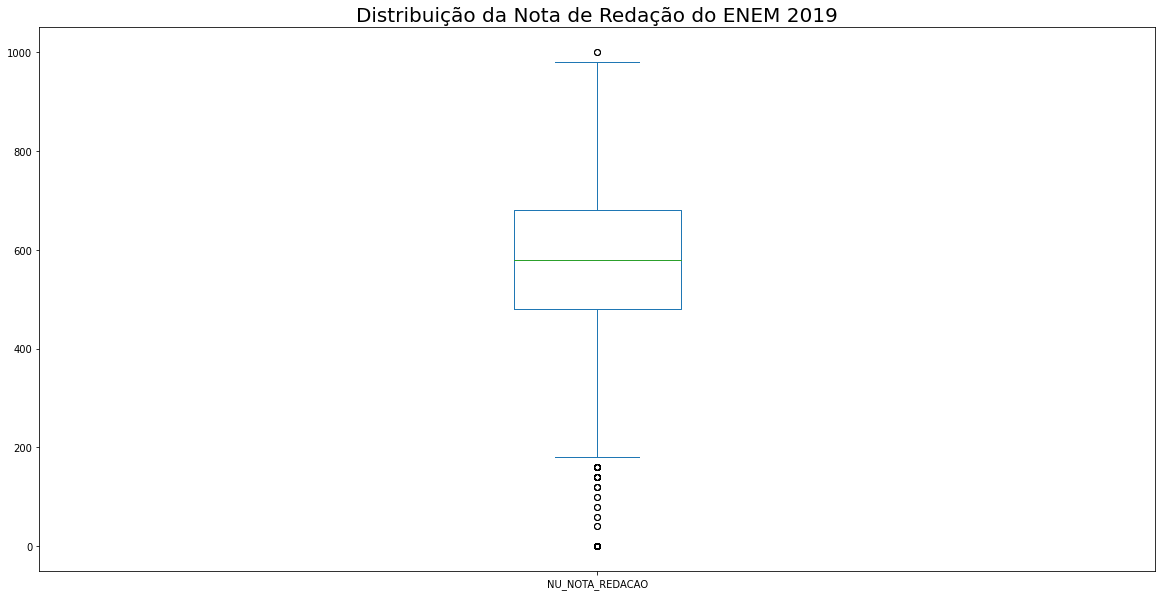

In [172]:
enem_df['NU_NOTA_REDACAO'].plot(kind='box', figsize=(20,10))

plt.title('Distribuição da Nota de Redação do ENEM 2019', fontsize=20)
plt.show()

In [179]:
enem_qr1 = enem_df['NU_NOTA_REDACAO'].quantile(0.25)
enem_qr3 = enem_df['NU_NOTA_REDACAO'].quantile(0.75)
enem_iqr = enem_qr3 - enem_qr1

print(f'Primeiro Quartil: {enem_qr1}\nTerceiro Quartil: {enem_qr3}\nQuartil Central: {enem_iqr}')

Primeiro Quartil: 480.0
Terceiro Quartil: 680.0
Quartil Central: 200.0


Podemos perceber que a grande maioria das notas estão situadas na faixa que compreende os 480 e 680 pontos (Quartil Interno), com alguns outliers - inscritos que fizeram acima de 950 pontos ou abaixo de 190.

### Pessoas mais velhas escrevem melhor que as mais novas?

Para responder a pergunta, utilizarei um gráfico de dispersão.

Coletando uma amostra de 100 inscritos, aleatoriamente selecionados.

In [195]:
enem_amostra = enem_df[['NU_IDADE', 'NU_NOTA_REDACAO']].sample(n=100, replace=False)
enem_amostra.dropna(inplace=True)
enem_amostra.isna().value_counts()

NU_IDADE  NU_NOTA_REDACAO
False     False              85
dtype: int64

In [197]:
enem_amostra.rename(columns={'NU_IDADE':'Idade', 'NU_NOTA_REDACAO': 'Nota_Redacao'}, inplace=True)

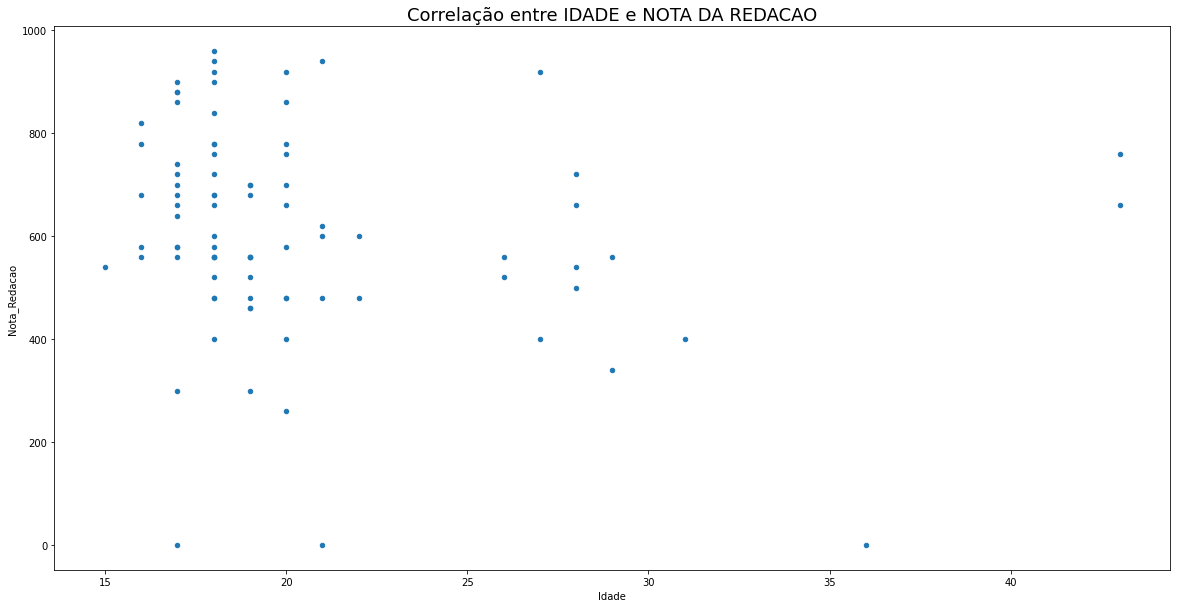

In [201]:
#plt.figure(figsize=(20,10))
enem_amostra.plot.scatter(x='Idade', y='Nota_Redacao', figsize=(20,10))


plt.title('Correlação entre IDADE e NOTA DA REDACAO', fontsize=18)
plt.show()

Como podemos observar, pessoas mais jovens (entre 15 e 25 anos) tendem a tirar notas mais altas. Mas, como foi observado anteriormente, o corpo do número de inscritos do ENEM é composto, majoritariamente, por pessoas jovens, logo, não existe uma imparcialidade entre as variáveis.